# State Farm Distracted Driver Detection

Downloading the data from kaggle

In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c state-farm-distracted-driver-detection -p "/content/Data/" 

 99% 3.98G/4.00G [01:09<00:00, 93.0MB/s]
100% 4.00G/4.00G [01:09<00:00, 61.5MB/s]


Extracting the data

In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/Data/state-farm-distracted-driver-detection.zip")
zip_ref.extractall(path = "/content/Data/Raw Data/")
zip_ref.close()

## Read and become one with data

Going to work on only train data, because the data in segregated only in the train data in class-wise.
Test data is just a collection of 75K images without any classes which is sort of a unsupervised learning.

In [4]:
raw_train_dir = "/content/Data/Raw Data/imgs/train/"
raw_test_dir = "/content/Data/Raw Data/imgs/test/"

In [5]:
# changing the class names(mentioned in the description of the dataset: https://www.kaggle.com/competitions/state-farm-distracted-driver-detection/data)
import os

new_names = {'c0': 'c0: safe driving',
'c1': 'c1: texting - right',
'c2': 'c2: talking on the phone - right',
'c3': 'c3: texting - left',
'c4': 'c4: talking on the phone - left',
'c5': 'c5: operating the radio',
'c6': 'c6: drinking',
'c7': 'c7: reaching behind',
'c8': 'c8: hair and makeup',
'c9': 'c9: talking to passenger'}

new_names

{'c0': 'c0: safe driving',
 'c1': 'c1: texting - right',
 'c2': 'c2: talking on the phone - right',
 'c3': 'c3: texting - left',
 'c4': 'c4: talking on the phone - left',
 'c5': 'c5: operating the radio',
 'c6': 'c6: drinking',
 'c7': 'c7: reaching behind',
 'c8': 'c8: hair and makeup',
 'c9': 'c9: talking to passenger'}

In [6]:
new_names.values()

dict_values(['c0: safe driving', 'c1: texting - right', 'c2: talking on the phone - right', 'c3: texting - left', 'c4: talking on the phone - left', 'c5: operating the radio', 'c6: drinking', 'c7: reaching behind', 'c8: hair and makeup', 'c9: talking to passenger'])

In [7]:
# Renaming the folders as per the labels


path = raw_train_dir
directory_list = os.listdir(path)

for filename in directory_list:
    src = filename
    dst = new_names[filename]
    os.rename(os.path.join(path, src), os.path.join(path, dst))

print("Rename is completed")

Rename is completed


In [27]:
# Walk through all the classes directory and list the no. of images
total = []
for dirpath, dirnames, filenames in os.walk("/content/Data/Raw Data/imgs/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}'.'")
    i = len(filenames)
    total.append(i)
total = sum(total[:-1])
print(f'Total training images: {total} and testing images: {i}')    

There are 2 directories and 0 images in /content/Data/Raw Data/imgs/'.'
There are 10 directories and 0 images in /content/Data/Raw Data/imgs/train'.'
There are 0 directories and 2312 images in /content/Data/Raw Data/imgs/train/c5: operating the radio'.'
There are 0 directories and 2129 images in /content/Data/Raw Data/imgs/train/c9: talking to passenger'.'
There are 0 directories and 2489 images in /content/Data/Raw Data/imgs/train/c0: safe driving'.'
There are 0 directories and 2326 images in /content/Data/Raw Data/imgs/train/c4: talking on the phone - left'.'
There are 0 directories and 2317 images in /content/Data/Raw Data/imgs/train/c2: talking on the phone - right'.'
There are 0 directories and 2267 images in /content/Data/Raw Data/imgs/train/c1: texting - right'.'
There are 0 directories and 2325 images in /content/Data/Raw Data/imgs/train/c6: drinking'.'
There are 0 directories and 2002 images in /content/Data/Raw Data/imgs/train/c7: reaching behind'.'
There are 0 directories an

In [ ]:
import plotly.express as px
count = []
labels = []
for dirpath, dirnames, filenames in os.walk(raw_train_dir):
    count.append(len(filenames))
    labels.append(dirnames)
px.bar(x = count[1:], y = labels[0], title="Total Images per Labels", labels={'x':'Count', 'y': 'Labels'})

In [ ]:
# Split the data into 1%, 10% and 80% - training set.
!pip install split-folders
import splitfolders
data_split_1percent = splitfolders.ratio(input = raw_train_dir,
                                         output = "/content/Data/1_percent_train_data/",
                                         seed = 42, 
                                         ratio = (0.01, 0.99))
data_split_10percent = splitfolders.ratio(input = raw_train_dir,
                                         output = "/content/Data/10_percent_train_data/",
                                         seed = 42, 
                                         ratio = (0.10, 0.90))
data_split_80percent = splitfolders.ratio(input = raw_train_dir,
                                         output = "/content/Data/80_percent_train_data/",
                                         seed = 42, 
                                         ratio = (0.80, 0.20))
data_split_1percent
data_split_10percent
data_split_80percent

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 22424 files [00:04, 5141.26 files/s]
Copying files: 22424 files [00:04, 5048.00 files/s]
Copying files: 22424 files [00:04, 4848.76 files/s]


## Simple CNN Model(TinyVGG) -

I will be referencing the TinyVGG Architecture from the CNN Explainer website.
Steps that I will be implementing:
1. Become one with data (already done above).
2. Preprocess the data. (prepare it for the model)
3. Create a Model. (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and try to beat the baseline.
7. Repeat until satisfied

**1. Become one with data**

In [ ]:
# Get tensorflow_helper_script.py script from course GitHub
!wget https://raw.githubusercontent.com/JohnPPinto/Tensorflow_Notes/main/Extras/tensorflow_helper_script.py

# Import helper functions we're going to use
from tensorflow_helper_script import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-09-16 06:19:54--  https://raw.githubusercontent.com/JohnPPinto/Tensorflow_Notes/main/Extras/tensorflow_helper_script.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12426 (12K) [text/plain]
Saving to: ‘tensorflow_helper_script.py’

tensorflow_helper_s 100%[===================>]  12.13K  --.-KB/s    in 0s      

2022-09-16 06:19:54 (81.9 MB/s) - ‘tensorflow_helper_script.py’ saved [12426/12426]



In [ ]:
# Data that I will be using in this model.
walk_through_dir("/content/Data/80_percent_train_data") 

There are 2 directories and 0 images in '/content/Data/80_percent_train_data'.
There are 10 directories and 0 images in '/content/Data/80_percent_train_data/train'.
There are 0 directories and 1601 images in '/content/Data/80_percent_train_data/train/c7: reaching behind'.
There are 0 directories and 1876 images in '/content/Data/80_percent_train_data/train/c3: texting - left'.
There are 0 directories and 1813 images in '/content/Data/80_percent_train_data/train/c1: texting - right'.
There are 0 directories and 1703 images in '/content/Data/80_percent_train_data/train/c9: talking to passenger'.
There are 0 directories and 1991 images in '/content/Data/80_percent_train_data/train/c0: safe driving'.
There are 0 directories and 1860 images in '/content/Data/80_percent_train_data/train/c6: drinking'.
There are 0 directories and 1853 images in '/content/Data/80_percent_train_data/train/c2: talking on the phone - right'.
There are 0 directories and 1849 images in '/content/Data/80_percent_tra

Looks good to me.

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(raw_train_dir)
label_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
label_names

array(['c0: safe driving', 'c1: texting - right',
       'c2: talking on the phone - right', 'c3: texting - left',
       'c4: talking on the phone - left', 'c5: operating the radio',
       'c6: drinking', 'c7: reaching behind', 'c8: hair and makeup',
       'c9: talking to passenger'], dtype='<U32')

How about we visualize random images?

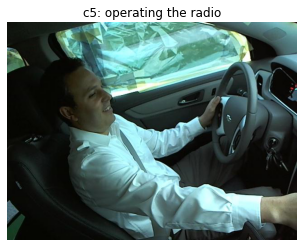

In [ ]:
# View random images from training set.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Creating a function to view random images 
def view_random_images(target_dir, target_class):
  """
  View any random images from any directory

  Args: target_dir - Train or Test Directory.
        target_class - Class Labels.
  """
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis(False)

view_random_images(raw_train_dir, random.choice(label_names))

Lets view all classes seprately.

In [ ]:
plt.figure(figsize=(20,30))
for i in range(0,10):
  plt.subplot(5, 2, i+1)
  view_random_images(raw_train_dir, label_names[i])

Output hidden; open in https://colab.research.google.com to view.

**2. Preprocess the data**

Current File structure, which is needed for processing the data
```
70_percent_train_data <- top level folder
└───train <- training images
│   └───c0: safe driving
│   │   │   img_100026.jpg
│   │   │   img_100074.jpg
│   │   │   ...      
│   └───c1: texting-right
│       │   img_100045.jpg
│       │   img_100135.jpg
│       │   ...
│   
└───test <- testing images
│   └───c0: safe driving
│   │   │   img_100003.jpg
│   │   │   img_100050.jpg
│   │   │   ...      
│   └───c1: texting-right
│       │   img_100021.jpg
│       │   img_100046.jpg
│       │   ...
```

In [ ]:
# Data directories
train_dir = "/content/Data/80_percent_train_data/train/"
test_dir = "/content/Data/80_percent_train_data/val"

In [ ]:
# Creating data inputs
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data_80_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=(256, 256),
                                                          batch_size=32,
                                                          class_mode="categorical")
test_data_20_percent = test_datagen.flow_from_directory(test_dir,
                                                          target_size=(256, 256),
                                                          batch_size=32,
                                                          class_mode="categorical")

Found 17934 images belonging to 10 classes.
Found 4490 images belonging to 10 classes.


This looks good. Total images we have are 22424.

After spliting at 80:20 ratio for train and test set, we have processed the data.

In [ ]:
# Class names and total size of the training data.
print(f"Total Batches: {len(train_data_80_percent)}")
print(f"Class Names: {train_data_80_percent.class_indices}")

Total Batches: 561
Class Names: {'c0: safe driving': 0, 'c1: texting - right': 1, 'c2: talking on the phone - right': 2, 'c3: texting - left': 3, 'c4: talking on the phone - left': 4, 'c5: operating the radio': 5, 'c6: drinking': 6, 'c7: reaching behind': 7, 'c8: hair and makeup': 8, 'c9: talking to passenger': 9}


Lets check whats stored in the training dataset after processing.

In [ ]:
#Train data is stored in batches of 32 images and a single batch has a shape of images as -> (32, 256, 256, 3) and labels as -> (32, 10)
train_data_80_percent[0][0].shape, train_data_80_percent[0][1].shape, train_data_80_percent[0][0]

((32, 256, 256, 3), (32, 10), array([[[[0.15294118, 0.18039216, 0.14901961],
          [0.15294118, 0.18039216, 0.14901961],
          [0.13725491, 0.1764706 , 0.14117648],
          ...,
          [0.97647065, 0.9921569 , 0.98823535],
          [1.        , 0.9843138 , 0.9803922 ],
          [1.        , 0.97647065, 0.9803922 ]],
 
         [[0.14509805, 0.17254902, 0.14117648],
          [0.14509805, 0.17254902, 0.14117648],
          [0.12941177, 0.16862746, 0.13333334],
          ...,
          [0.9725491 , 0.9960785 , 0.98823535],
          [0.97647065, 0.9960785 , 0.9803922 ],
          [0.9843138 , 0.9921569 , 0.9803922 ]],
 
         [[0.12941177, 0.15686275, 0.1254902 ],
          [0.13333334, 0.16078432, 0.12941177],
          [0.12156864, 0.16078432, 0.1254902 ],
          ...,
          [0.97647065, 1.        , 1.        ],
          [0.9607844 , 1.        , 0.9843138 ],
          [0.95294124, 1.        , 0.9843138 ]],
 
         ...,
 
         [[0.02352941, 0.02745098, 0.

**3. Create a Simple Model - Baseline Model**

Similar to TinyVGG of [CNN Explainer](https://poloclub.github.io/cnn-explainer/).

![](https://csdl-images.ieeecomputer.org/trans/tg/2021/02/figures/27tvcg02-wang-3030418-fig-4-source.gif)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Creating the model similar to TinyVGG architecture.
model_1 = Sequential([ 
    Conv2D(10, 3, activation='relu', input_shape =(256, 256, 3)), # Input Layer
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(), 
    Dense(10, activation='softmax') #output layer with activation softmax for 10 classes
])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(), #Keeping the learning rate by default 0.001 for now
                metrics=['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 10)       0         
 2D)                                                    

**4. Fit a Model**

In [ ]:
#fitting our model to our dataset
history_1 = model_1.fit(train_data_80_percent,
                        steps_per_epoch=len(train_data_80_percent),
                        epochs=5,
                        validation_data=test_data_20_percent,
                        validation_steps=len(test_data_20_percent),
                        callbacks=[create_tensorboard_callback("tensorboard_callback", "simple_model_tinyvgg")]) #tensorboard callback from the tensorflow_helper_script

Saving the TensorBoard callback log files to: tensorboard_callback/simple_model_tinyvgg/20220916-07:27:26
Epoch 1/5
561/561 [==============================] - 136s 222ms/step - loss: 0.4055 - accuracy: 0.8692 - val_loss: 0.0603 - val_accuracy: 0.9817
Epoch 2/5
561/561 [==============================] - 130s 232ms/step - loss: 0.0358 - accuracy: 0.9899 - val_loss: 0.0804 - val_accuracy: 0.9751
Epoch 3/5
561/561 [==============================] - 124s 221ms/step - loss: 0.0168 - accuracy: 0.9957 - val_loss: 0.0442 - val_accuracy: 0.9853
Epoch 4/5
561/561 [==============================] - 122s 217ms/step - loss: 0.0176 - accuracy: 0.9944 - val_loss: 0.0826 - val_accuracy: 0.9737
Epoch 5/5
561/561 [==============================] - 121s 216ms/step - loss: 0.0119 - accuracy: 0.9963 - val_loss: 0.0661 - val_accuracy: 0.9824


The result are too good for running it the first time that to on our simple model.

Lets evaluate and see.

**5. Evaluate the model**

In [ ]:
#evaluate on the test dataset
test_result_tinyvgg = model_1.evaluate(test_data_20_percent)

141/141 [==============================] - 25s 174ms/step - loss: 0.0661 - accuracy: 0.9824


99% accuracy on the test dataset.

Lets vizualize and see what's exactly happing with our model.

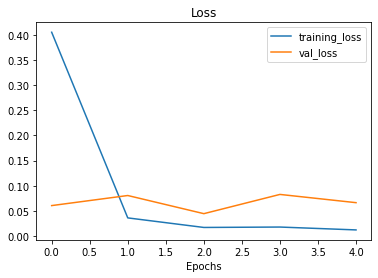

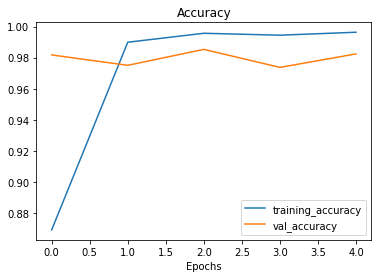

In [ ]:
plot_loss_curves(history_1)

There are no gaps between train and test dataset.

It looks like our model is working quite nicely on the dataset.

Lets visualize the images and their prediction.

In [ ]:
def predict_plot_img(model, filename, classes, image_size, img_chls = 3):
  """
  Predict and plot a single image.

  Args:
    Model: Model name.
    Filename: Path of the image file.
    Classes: List of class names in ascending order.
    image_size: Image size in list structure [height, width].
    img_chls: Number of color channels. Default is 3.
  """
  # Read and process the image
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=image_size)
  img = img/255.

  # Predict the image
  predict = model.predict(tf.expand_dims(img, axis=0)).argmax()

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {classes[predict]}")
  plt.axis(False)

/content/Data/Raw Data/imgs/test/img_28779.jpg


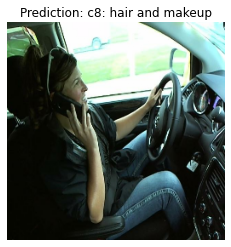

In [ ]:
import  random
path = test_dir + "/" + random.choice(label_names) + "/"
image_path = raw_test_dir + random.choice(os.listdir(raw_test_dir))
image_path

predict_plot_img(model_1, image_path, label_names, [256, 256], 3)
print(image_path)